In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#load train and test files
train = pd.read_csv('train_BRCpofr.csv')
test = pd.read_csv('test_koRSKBP.csv')

In [3]:
print(train.shape, test.shape)

(89392, 12) (59595, 11)


In [4]:
train

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736
...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388,Male,Rural,High School,More than 10L,0,6,0,More than 1,B,Platinum,95736
89388,89389,Male,Urban,Bachelor,5L-10L,1,0,3897,More than 1,A,Platinum,67596
89389,89390,Female,Urban,Bachelor,5L-10L,0,4,3363,More than 1,B,Platinum,114120
89390,89391,Female,Rural,High School,2L-5L,0,8,0,More than 1,B,Platinum,71772


In [5]:
train[['claim_amount', 'cltv']].describe()

,claim_amount,cltv
count,89392.000000,89392.000000
mean,4351.502416,97952.828978
std,3262.359775,90613.814793
min,0.000000,24828.000000
25%,2406.000000,52836.000000
50%,4089.000000,66396.000000
75%,6094.000000,103440.000000
max,31894.000000,724068.000000


<AxesSubplot:xlabel='claim_amount', ylabel='Count'>

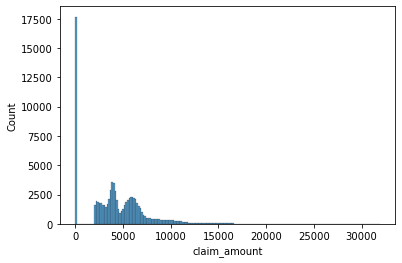

In [6]:
sns.histplot((train.claim_amount))

<AxesSubplot:xlabel='cltv', ylabel='Count'>

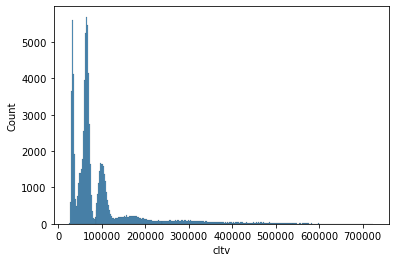

In [7]:
sns.histplot((train.cltv))

In [8]:
train.policy.unique()

array(['A', 'C', 'B'], dtype=object)

In [9]:
train.type_of_policy.unique()

array(['Platinum', 'Gold', 'Silver'], dtype=object)

In [10]:
train.nunique()

id                89392
gender                2
area                  2
qualification         3
income                4
marital_status        2
vintage               9
claim_amount      10889
num_policies          2
policy                3
type_of_policy        3
cltv              18796
dtype: int64

In [11]:
train.vintage.unique()

array([5, 8, 7, 6, 1, 0, 3, 4, 2], dtype=int64)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [13]:
 for col in train.select_dtypes(['object']).columns:
        print(col, train[col].unique())

gender ['Male' 'Female']
area ['Urban' 'Rural']
qualification ['Bachelor' 'High School' 'Others']
income ['5L-10L' 'More than 10L' '2L-5L' '<=2L']
num_policies ['More than 1' '1']
policy ['A' 'C' 'B']
type_of_policy ['Platinum' 'Gold' 'Silver']


In [14]:
qualification_dict = {'Others': 0,'High School':1, 'Bachelor': 2}
income_dict = {'<=2L': 0,  '2L-5L':1, '5L-10L':2,  'More than 10L' :3 }
num_policies_dict =  {'1': 0,'More than 1': 1 }
type_of_policy_dict = { 'Silver': 0,  'Gold' : 1 , 'Platinum': 2}

In [15]:
train.columns

Index(['id', 'gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy',
       'cltv'],
      dtype='object')

In [16]:
def label_df(df):
    qualification_dict = {'Others': 0,'High School':1, 'Bachelor': 2}
    income_dict = {'<=2L': 0,  '2L-5L':1, '5L-10L':2,  'More than 10L' :3 }
    num_policies_dict =  {'1': 0,'More than 1': 1 }
    type_of_policy_dict = { 'Silver': 0,  'Gold' : 1 , 'Platinum': 2}
    
    df['qualification'] = df['qualification'].map(qualification_dict)
    df['income'] = df['income'].map(income_dict)
    df['num_policies'] = df['num_policies'].map(num_policies_dict)
    df['type_of_policy'] =  df['type_of_policy'].map(type_of_policy_dict)   
    
    return df

In [17]:
label_df(train)

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,2,2,1,5,5790,1,A,2,64308
1,2,Male,Rural,1,2,0,8,5080,1,A,2,515400
2,3,Male,Urban,2,2,1,8,2599,1,A,2,64212
3,4,Female,Rural,1,2,0,7,0,1,A,2,97920
4,5,Male,Urban,1,3,1,6,3508,1,A,1,59736
...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388,Male,Rural,1,3,0,6,0,1,B,2,95736
89388,89389,Male,Urban,2,2,1,0,3897,1,A,2,67596
89389,89390,Female,Urban,2,2,0,4,3363,1,B,2,114120
89390,89391,Female,Rural,1,1,0,8,0,1,B,2,71772


In [18]:
label_df(test)

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,1,2,0,6,2134,1,B,0
1,89394,Female,Urban,1,1,0,4,4102,1,A,2
2,89395,Male,Rural,1,2,1,7,2925,1,B,1
3,89396,Female,Rural,2,3,1,2,0,1,B,0
4,89397,Female,Urban,1,1,0,5,14059,1,B,0
...,...,...,...,...,...,...,...,...,...,...,...
59590,148983,Male,Rural,2,2,1,6,0,0,A,0
59591,148984,Male,Urban,1,2,0,6,0,0,C,1
59592,148985,Female,Urban,1,1,1,4,3323,1,B,2
59593,148986,Male,Rural,2,2,0,1,2886,1,A,0


In [19]:
train = pd.get_dummies(train, drop_first = True)

In [20]:
test  = pd.get_dummies(test, drop_first = True)

In [21]:
train_features = train.drop(['id', 'cltv'], axis = 'columns')

In [22]:
train_target = train['cltv']

In [23]:
test_features = test.drop(['id'], axis = 'columns')

In [24]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRFRegressor
from lightgbm import LGBMRegressor

C:\Users\ramar\anaconda3\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\ramar\anaconda3\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\ramar\anaconda3\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [25]:
from sklearn.model_selection import cross_val_score

In [49]:
model_1 = GradientBoostingRegressor(n_estimators= 200, learning_rate= 0.05)
model_2 = XGBRFRegressor(n_estimators = 500, learning_rate=1)
model_3 = LGBMRegressor(n_estimators= 50, learning_rate= 0.1)
models = [model_1, model_2, model_3]
names = ['gbr','xgbrf','lgbm']

In [50]:
submissions = test[['id']].copy()

In [51]:
for model,name in zip(models,names):
    model.fit(train_features, train_target)
    submissions.loc[:,name] = model.predict(test_features)
    

In [54]:
submissions.head()

,id,gbr,xgbrf,lgbm
0,89393,91212.084880,90801.117188,91608.604402
1,89394,130293.163874,125922.375000,130848.657334
2,89395,92412.847836,92863.101562,92138.165956
3,89396,85363.900550,88901.062500,87958.315911
4,89397,134315.735076,135145.515625,131162.002206


In [55]:
submissions.columns

Index(['id', 'gbr', 'xgbrf', 'lgbm'], dtype='object')

In [73]:
weight1 = {'gbr' : 0.33, 'xgbrf': 0.33, 'lgbm' : 0.33}

In [74]:
submissions['weight'] = 0
for col, weight in weights.items():
    submissions['weight'] += submissions[col]*weight

In [75]:
submissions.head(3)

,id,gbr,xgbrf,lgbm,weight1,weight
0,89393,91212.084880,90801.117188,91608.604402,90295.196604,90295.196604
1,89394,130293.163874,125922.375000,130848.657334,127731.187717,127731.187717
2,89395,92412.847836,92863.101562,92138.165956,91546.658770,91546.658770


In [76]:
av_sub = submissions[['id','weight']].copy()
av_sub.rename(columns = {'weight':'cltv'}, inplace = True)
av_sub.to_csv('sub_weight1.csv', index = False)

In [77]:
weight2 = {'gbr' : 0.5, 'xgbrf': 0.25, 'lgbm' : 0.25}
submissions['weight'] = 0
for col, weight in weights.items():
    submissions['weight'] += submissions[col]*weight
av_sub = submissions[['id','weight']].copy()
av_sub.rename(columns = {'weight':'cltv'}, inplace = True)
av_sub.to_csv('sub_weight2.csv', index = False)

In [79]:
weight3 = {'gbr' : 0.25, 'xgbrf': 0.5, 'lgbm' : 0.25}
submissions['weight'] = 0
for col, weight in weights.items():
    submissions['weight'] += submissions[col]*weight
av_sub = submissions[['id','weight']].copy()
av_sub.rename(columns = {'weight':'cltv'}, inplace = True)
av_sub.to_csv('sub_weight3.csv', index = False)

In [80]:
weight4 = {'gbr' : 0.25, 'xgbrf': 0.25, 'lgbm' : 0.5}
submissions['weight'] = 0
for col, weight in weights.items():
    submissions['weight'] += submissions[col]*weight
av_sub = submissions[['id','weight']].copy()
av_sub.rename(columns = {'weight':'cltv'}, inplace = True)
av_sub.to_csv('sub_weight4.csv', index = False)